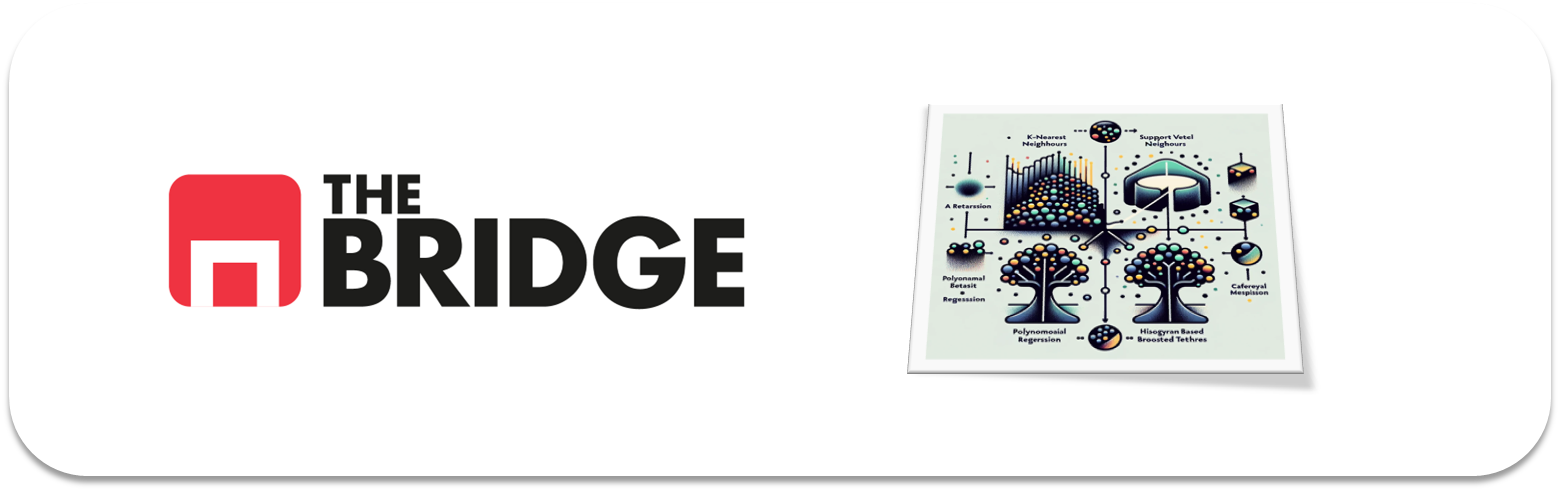

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [ ]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target
- una para clasificación que permita predecir la calidad del vino según el resto de propiedas 
- y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

## 0. Carga de Datos y primera visualización

In [2]:
df = pd.read_csv("./data/wines_dataset.csv",sep="|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


*Está limpio*

In [4]:
bt.tipifica_variable_plus(df)

Umbral de 'CARD_valores_unicos' para considerarla 'Categórica':  10
Umbral de 'CARD_%' para considerarla 'Numérica Continua':  30.0


,Variable,Missings_%,Dtype_real,CARD_valores_unicos,CARD_%,Dtype_sugerido
0,fixed acidity,0.0,float64,106,1.63,Numérica Discreta
1,volatile acidity,0.0,float64,187,2.88,Numérica Discreta
2,citric acid,0.0,float64,89,1.37,Numérica Discreta
3,residual sugar,0.0,float64,316,4.86,Numérica Discreta
4,chlorides,0.0,float64,214,3.29,Numérica Discreta
5,free sulfur dioxide,0.0,float64,135,2.08,Numérica Discreta
6,total sulfur dioxide,0.0,float64,276,4.25,Numérica Discreta
7,density,0.0,float64,998,15.36,Numérica Discreta
8,pH,0.0,float64,108,1.66,Numérica Discreta
9,sulphates,0.0,float64,111,1.71,Numérica Discreta


In [ ]:
# Target clasificación
target_clf= "quality"

# Target regresión
target_reg= "alcohol"

## Analisis de los TARGET

##### Target CLASIFICACIÓN

In [6]:
df[target_clf].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

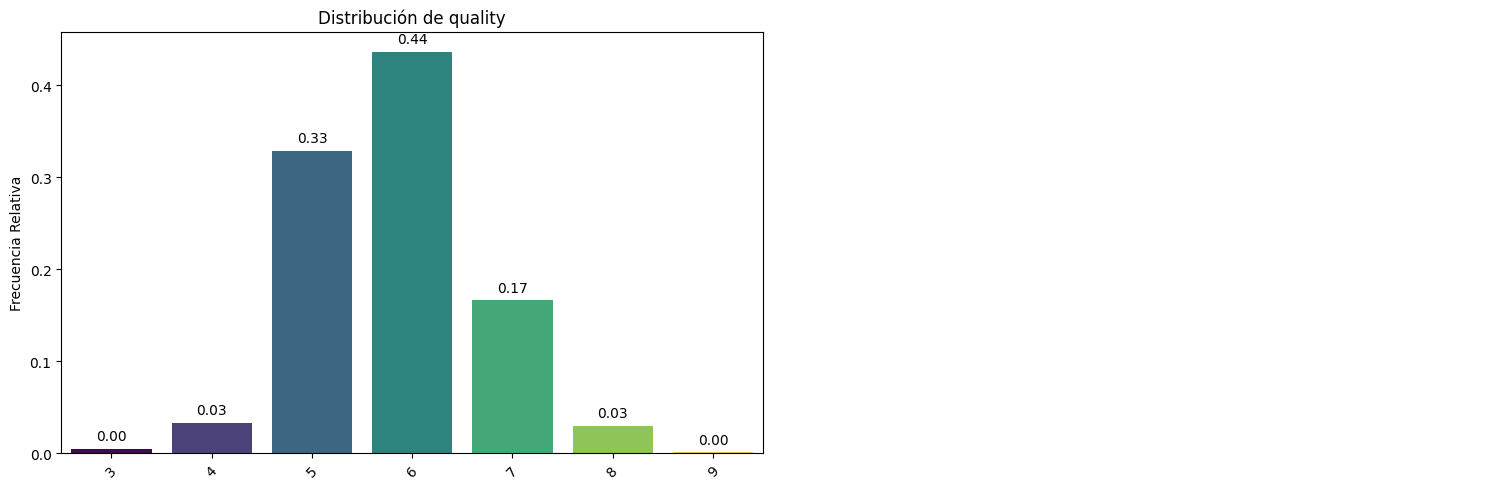

In [7]:
bt.pinta_distribucion_categoricas(df, [target_clf], mostrar_valores = True, relativa = True)

*- Bastante desbalanceado. Habrá que tenerlo en cuenta en un futuro*

*- Parece que la escala de valores va del 0 al 10, aunque alguno no esten representados*

##### Target REGRESION

<Axes: xlabel='alcohol', ylabel='Count'>

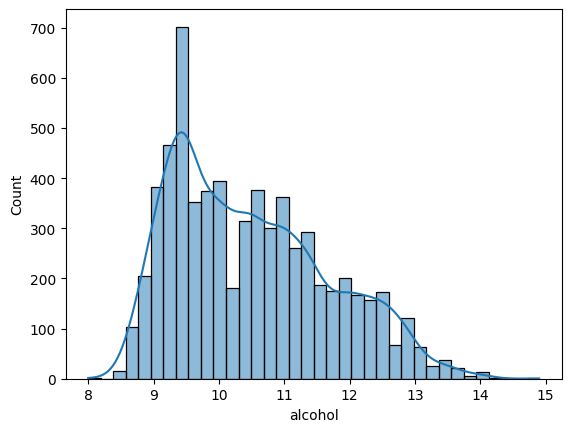

In [8]:
sns.histplot(df[target_reg], kde = True)

*- Parece que está bastante aceptable*

## 1. Split TRAIN/TEST

In [9]:
# Nos vale para los dos problemas:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

## #A - Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. 
- Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. 
- Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada).
- El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.
- Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [10]:
train_set_clf = train_set.copy()
test_set_clf = test_set.copy()

# Target clasificación
target_clf= "quality"

train_set_clf.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.9960,3.33,0.93,11.3,5,red
947,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.9996,3.38,0.67,9.0,6,white
877,7.6,0.51,0.24,1.2,0.040,10.0,104.0,0.9920,3.05,0.29,10.8,6,white


### 2. miniEDA

#### 2.1. Categóricas

*La única que tengo es 'class' porque 'quality' es el target*

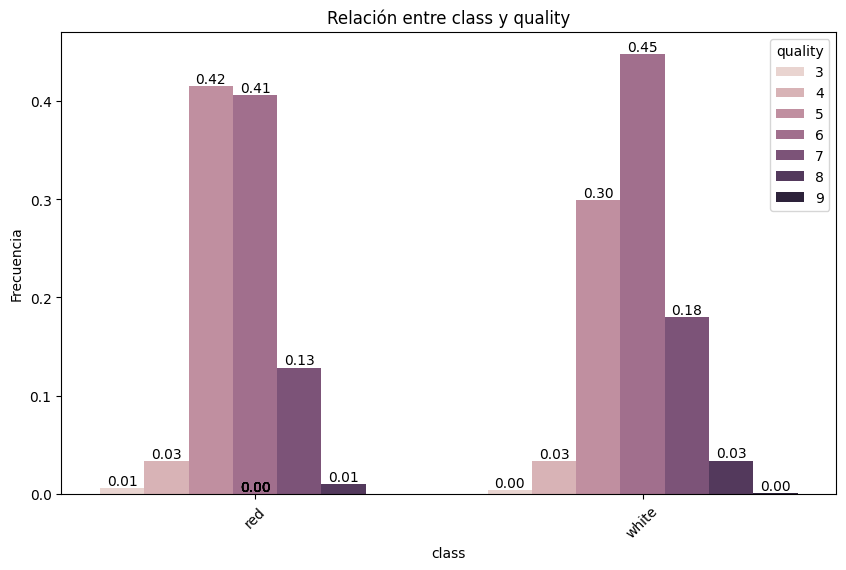

In [14]:
# MiniEDA: Clasificación

# Categóricas 

bt.plot_categorical_relationship_fin(train_set, "class", target_clf, show_values= True, relative_freq= True)

*Como hay diferencias me invita a quedarmela*

In [16]:
features_cat_clf = ["class"]

#### 2.2. Numéricas

*El resto de variables son numericas*

In [20]:
# Analizamos las numéricas 

features_num_clf = [col for col in train_set.columns if col != "class" and col != target_clf] # Me quedo con todas que no son categóricas, ni el target
print(len(features_num_clf)) # Veo cuantas son para saber qué utilizar si pairplot o las funciones de bt

11


In [21]:
# for col in features_num_clf:
#    bt.plot_grouped_histograms(train_set, cat_col= target_clf, num_col= col, group_size= train_set[target_clf].nunique())

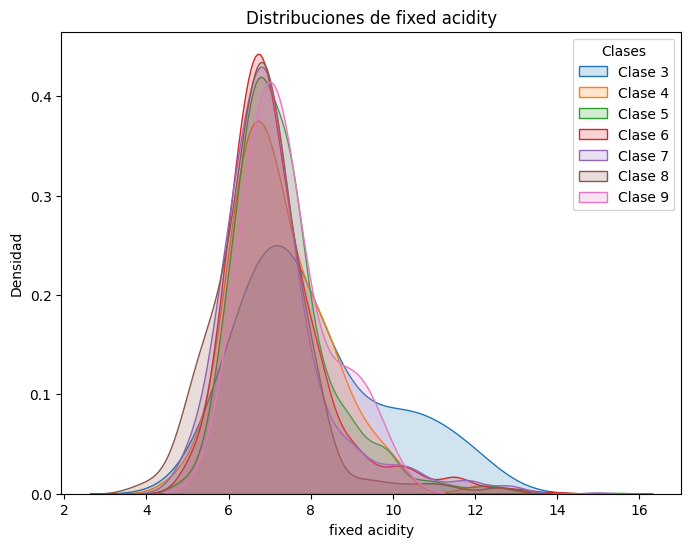

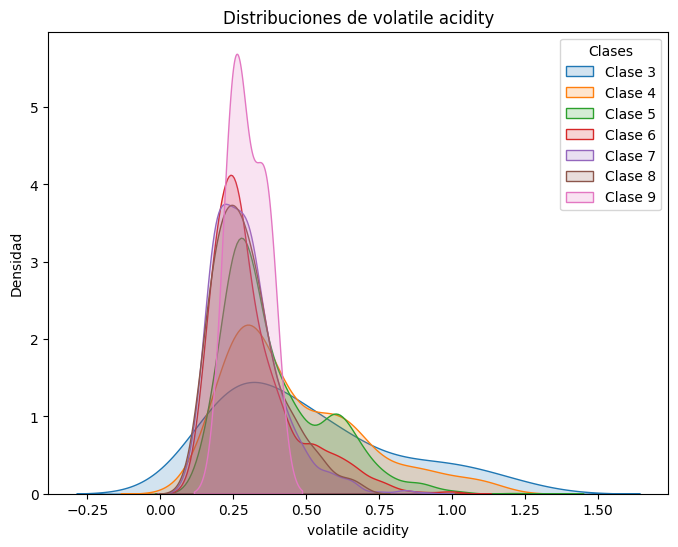

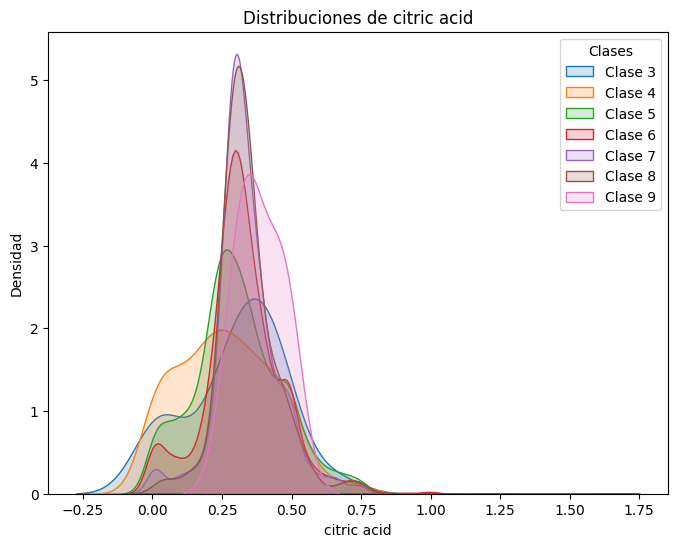

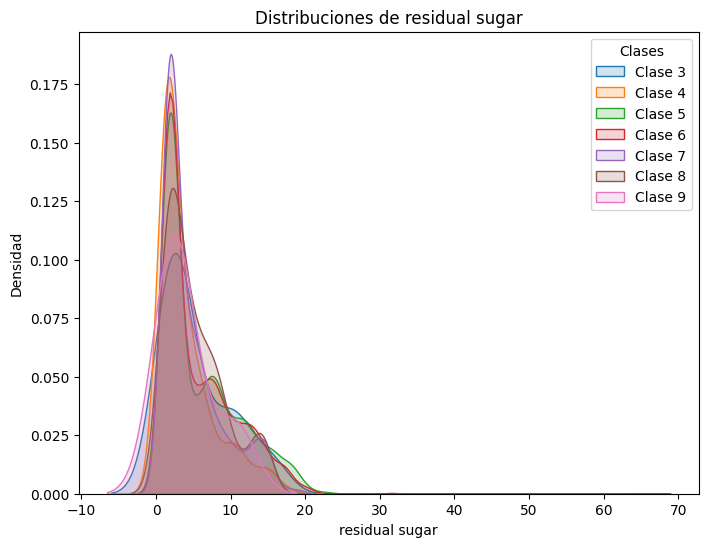

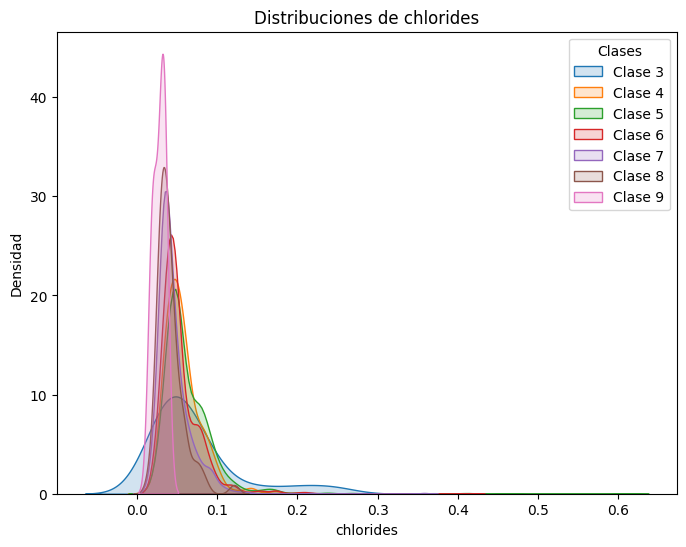

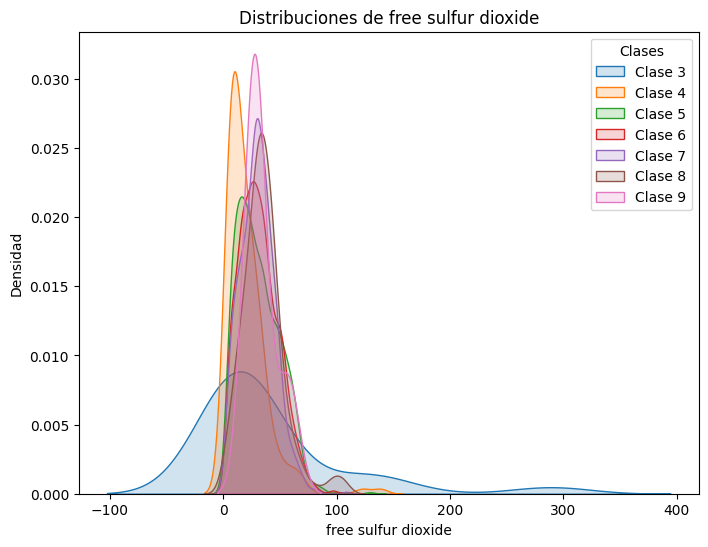

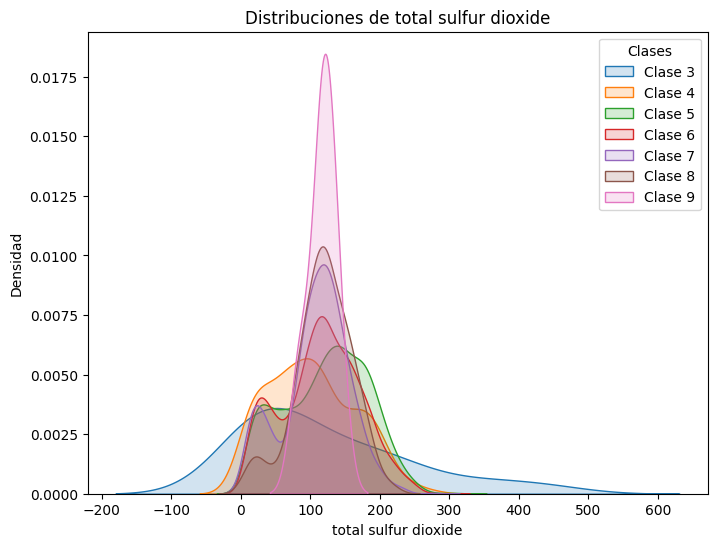

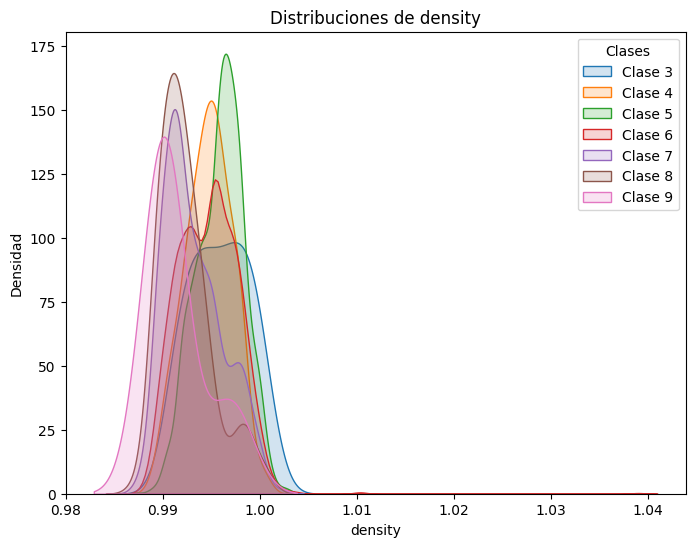

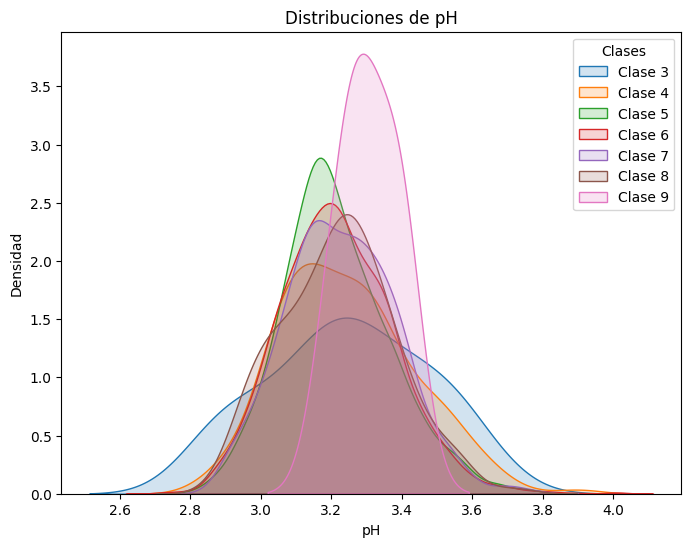

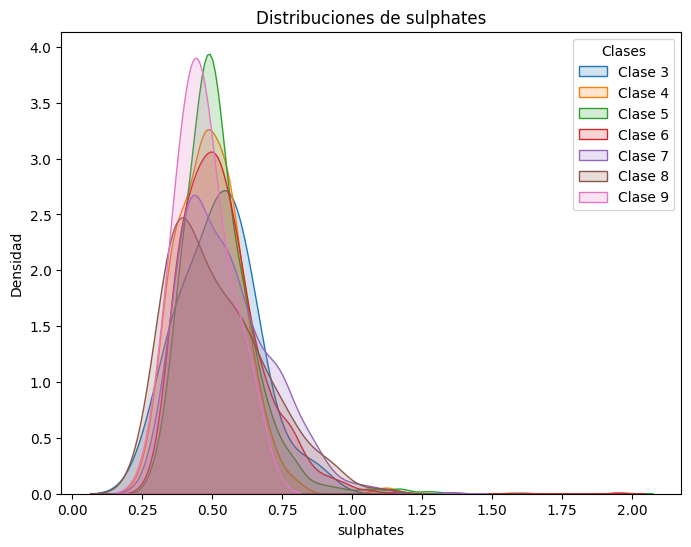

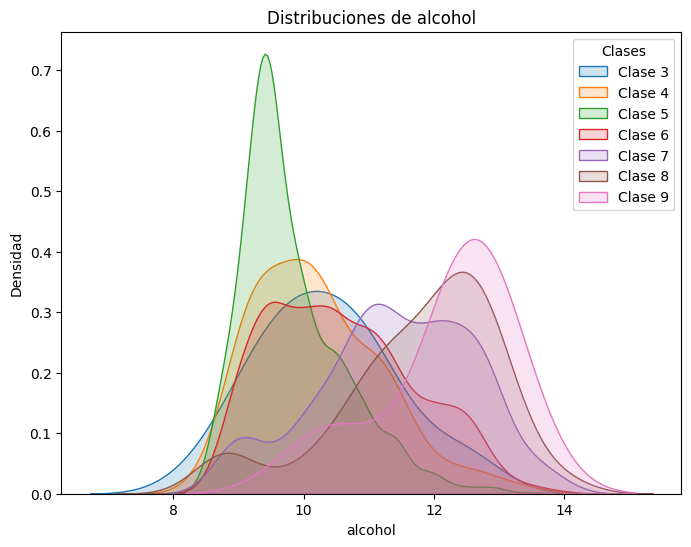

In [22]:
valores_target = train_set[target_clf].unique().tolist() 

for col in features_num_clf:
     plt.figure(figsize=(8, 6))  
     for i in sorted(valores_target):  
         sns.kdeplot(
             train_set[train_set[target_clf] == i][col],
             fill=True,
             alpha=0.2,
             label=f"Clase {i}" 
         )
         
     plt.title(f"Distribuciones de {col}")
     plt.xlabel(col)
     plt.ylabel("Densidad")
     plt.legend(title="Clases")
     plt.show()

Analizando una a una:

- ***fixed_acidity***: En general bastante superposición de todas las distribuciones. **Secundaria**
- ***volatile_acidity***: Tiene un desplazamiento entre 5 y 6 y varios ligeros desplazamientos del resto. **Primaria** aunque sin expectativas
- ***citric_acid***: Desplazamiento, ligero pero existente entre casi todas las curvas. **Primaria** sin expectativas
- ***residual_sugar***: Superposición y alineamiento. **Secundaria**
- ***Chlorides***: Cruces y desplazamientos de las densidades e histogramas entre sí. **Primaria**
- ***free_sulfur_dioxide***: Desplazamiento de las curvas entre sí y cruces. **Primaria**
- ***total_sulfur_dioxide***: Como la anterior, quizá deberíamos ver si las dos están muy correladas y quitarnos una, mientras tanto -> **Primaria**
- ***desinty***: Desplazamiento de las curvas y cruces. **Primaria**
- ***pH***: Ligeros desplazamientos, no espero mucho pero la incluyo en **Primaria** con reservas
- ***sulphates***: Superposición para notas bajas desplazamientos para altas. **Primaria** con reservas
- ***alcohol***: Curvas diferenciadas y algunas claramente separadas. **Primaria**

In [23]:
# Las que parece que tienen menos relevancia sobre la calidad del vino son el azucar residual y los sulfatos

In [24]:
features_num_clf_1 = ["volatile acidity","citric acid","chlorides","free sulfur dioxide","total sulfur dioxide", "density","pH","sulphates","alcohol"]
features_num_clf_2 = ["fixed acidity","residual sugar"]

#### 2.3. Seleccion de features

In [26]:
print("CAT: ", features_cat_clf)
print("NUM_1: ", features_num_clf_1)
print("NUM_1: ", features_num_clf_2)

CAT:  ['class']
NUM_1:  ['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
NUM_1:  ['fixed acidity', 'residual sugar']


### 3. TRATAMIENTO DE FEATURES

*Tratamos ahora las features (necesitamos escalar porque vamos a emplear un KNN y además tenemos que convertir las categóricas)*

#### 3.1. Categóricas

In [27]:
features_cat_clf

['class']

In [28]:
# Mapeo y asigno 0,1 la variable "class" tanto en TRAIN como en TEST
train_set_clf["class"] = (train_set_clf["class"] == "white").astype(int) # white -> clase 1, red -> clase 0
test_set_clf["class"] = (test_set_clf["class"] == "white").astype(int) # white -> clase 1, red -> clase 0

In [29]:
# Dejamos "quality" (por ser el target). Se tratrá en el problema de regresion

#### 3.2. Numéricas

##### 3.2.1. Transformaciones

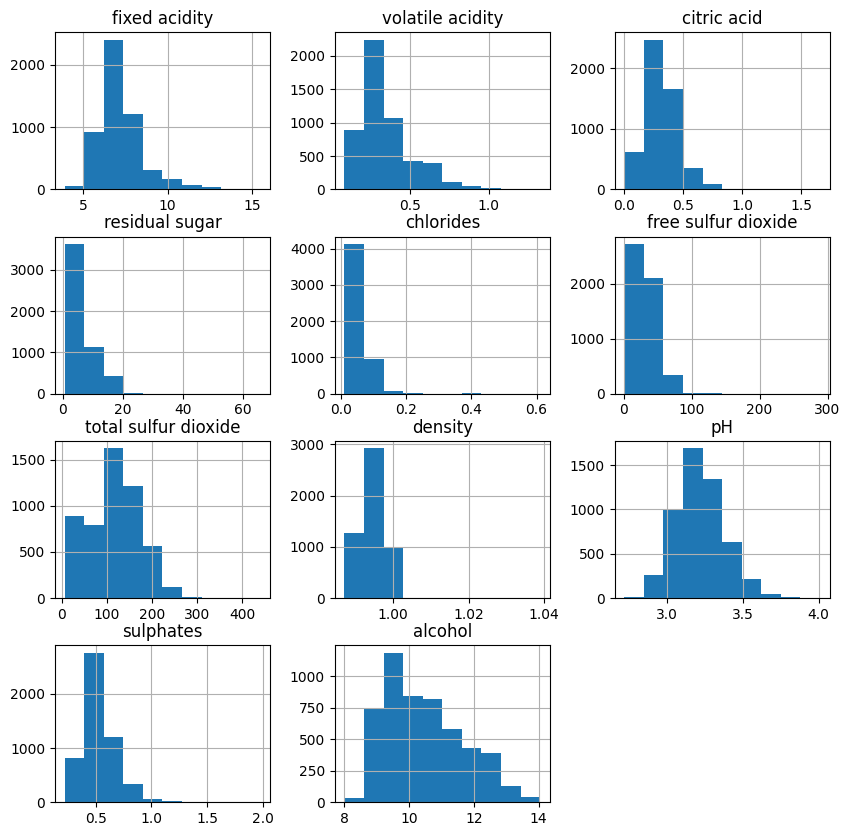

In [30]:
train_set_clf[features_num_clf].hist(figsize = (10,10))
plt.tight_layout
plt.show()

In [31]:
# Backup antes de realizar transformaciones
train_set_clf_scaled = train_set_clf.copy()
test_set_clf_scaled = test_set_clf.copy()

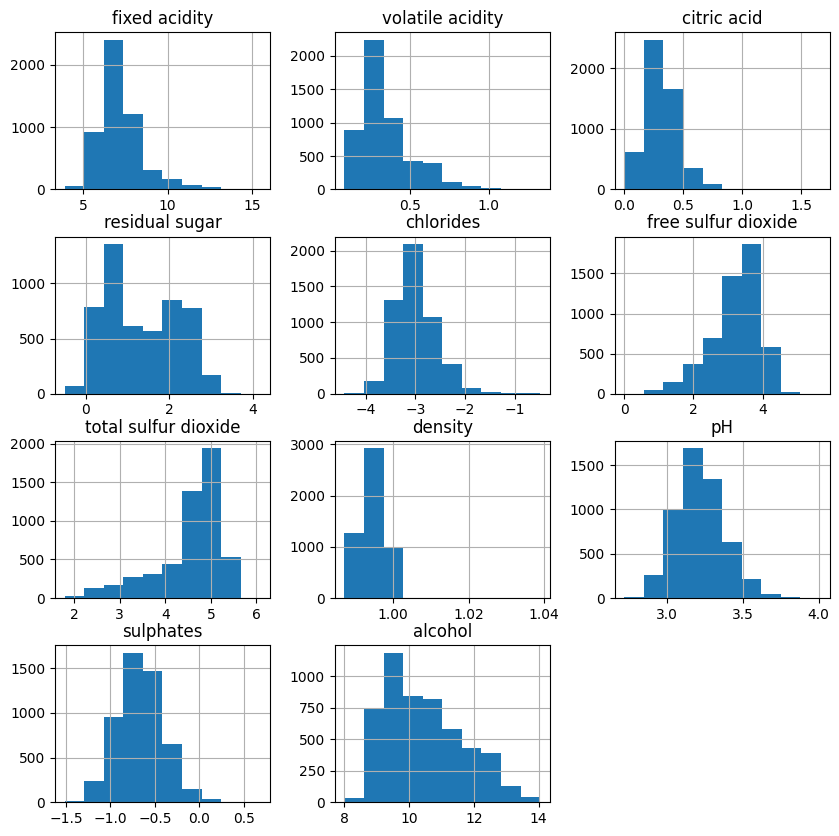

In [32]:
# Tras analizar el histogramas, aquellas que voy a transformar
features_to_transform = [
    "residual sugar", 
    "chlorides",
    "free sulfur dioxide", 
    "total sulfur dioxide",
    "sulphates"
    ]

# Las que voy a desplazar
for col in features_to_transform:
    desplaza = 0
    if train_set_clf_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_clf_scaled[col].min())) + 1
    
    # TRAIN
    train_set_clf_scaled[col] = np.log(train_set_clf_scaled[col] + desplaza)
    # TEST
    test_set_clf_scaled[col] = np.log(test_set_clf_scaled[col] + desplaza)


# Así nos quedaría
train_set_clf_scaled[features_num_clf].hist(figsize = (10,10))
plt.tight_layout
plt.show()

##### 3.2.2. Escalado

*En features_num_clf están todas las numéricas, así que me ahorra tener que tratarlas por separado, luego sí que las seleccionaremos por separado. Pero ya separando para regresion y para clasificacion*

In [33]:
print(features_num_clf)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [34]:
scaler = StandardScaler()

# Transformaciones a TRAIN y TEST (de todas las numericas)
train_set_clf_scaled[features_num_clf] = scaler.fit_transform(train_set_clf_scaled[features_num_clf])
test_set_clf_scaled[features_num_clf] = scaler.transform(test_set_clf_scaled[features_num_clf])

# Checkeo
train_set_clf_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5197.000000,5197.000000
mean,1.093774e-16,-2.816467e-16,-9.297076e-17,2.734434e-18,5.714968e-16,-1.709021e-16,1.668005e-16,5.706764e-14,2.365286e-16,-8.169122e-17,1.346709e-16,5.817587,0.751780
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,0.870688,0.432022
min,-2.560983e+00,-1.593077e+00,-2.187140e+00,-2.130418e+00,-3.375535e+00,-4.578518e+00,-3.851433e+00,-2.524538e+00,-3.119464e+00,-3.303529e+00,-2.085824e+00,3.000000,0.000000
25%,-6.287648e-01,-6.723928e-01,-4.743893e-01,-8.590345e-01,-6.595501e-01,-5.432713e-01,-3.193079e-01,-7.815705e-01,-6.821081e-01,-6.902881e-01,-8.295250e-01,5.000000,1.000000
50%,-1.650324e-01,-3.041192e-01,-6.332925e-02,-2.678746e-01,-1.587052e-01,2.174037e-01,2.927357e-01,6.169387e-02,-5.714499e-02,-2.494373e-02,-1.594991e-01,6.000000,1.000000
75%,3.759889e-01,3.710490e-01,5.532609e-01,8.815795e-01,6.052801e-01,7.105928e-01,6.811085e-01,7.588809e-01,6.303145e-01,6.087895e-01,6.780332e-01,6.000000,1.000000
max,6.404511e+00,6.079289e+00,9.185522e+00,3.305764e+00,5.884922e+00,3.491975e+00,2.123631e+00,1.469598e+01,4.942560e+00,5.264422e+00,2.981247e+00,9.000000,1.000000


### 4. MODELADO

#### 4.1. Creación X e Y

*Creamos X,y variados*

In [54]:
# X
X_train_clf= train_set_clf.drop(columns = target_clf)
X_train_clf_scaled = train_set_clf_scaled.drop(columns = target_clf)

X_test_clf= test_set_clf_scaled.drop(columns = target_clf)

# Y
y_train_clf= train_set_clf[target_clf]
y_test_clf_scaled = test_set_clf_scaled[target_clf]

y_test_clf= test_set_clf_scaled[target_clf]


print(X_train_clf.shape)
print(y_train_clf.shape)
print(X_test_clf.shape)
print(y_test_clf.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [36]:
X_train_clf.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
1916,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.9960,3.33,0.93,11.3,0
947,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.9996,3.38,0.67,9.0,1


In [37]:
X_train_clf_scaled.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
1916,0.530566,-0.979287,0.553261,-0.626806,-0.060514,0.602369,-0.494651,0.426887,0.692811,2.317739,0.678033,0
947,-0.087744,-0.979287,2.882601,1.640058,-0.314118,0.811171,0.848922,1.622065,1.005292,1.039085,-1.248291,1


In [38]:
X_train_clf_dict = {}
X_test_clf_dict = {}

# Juegos X_train clasificacion
features_set_name = ["CAT + NUM_1", "CAT + NUM_1 + NUM_2 (TODAS)"]
features_set = [features_cat_clf + features_num_clf_1,
                features_cat_clf + features_num_clf_1 + features_num_clf_2]


for set_name,feature_list in zip(features_set_name, features_set):
    
    print(f"Set features '{set_name}'\n", feature_list)
    print("")
    
    X_train_clf_dict[set_name] = train_set_clf_scaled[feature_list]
    X_test_clf_dict[set_name] = test_set_clf_scaled[feature_list]

Set features 'CAT + NUM_1'
 ['class', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Set features 'CAT + NUM_1 + NUM_2 (TODAS)'
 ['class', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'fixed acidity', 'residual sugar']



In [39]:
X_train_clf_dict["CAT + NUM_1 + NUM_2 (TODAS)"].head(2)

,class,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fixed acidity,residual sugar
1916,0,-0.979287,0.553261,-0.060514,0.602369,-0.494651,0.426887,0.692811,2.317739,0.678033,0.530566,-0.626806
947,1,-0.979287,2.882601,-0.314118,0.811171,0.848922,1.622065,1.005292,1.039085,-1.248291,-0.087744,1.640058


#### 4.2. Instanciamos modelos

#### A) Instanciacion 1

In [40]:
# Instanciamos modelos
knn_clf =       KNeighborsClassifier(n_neighbors= 5)

knn_ten_clf =   KNeighborsClassifier(n_neighbors= 10)

lr_clf =        LogisticRegression(max_iter = 1000)

rf_clf =        RandomForestClassifier(max_depth = 10, 
                                       random_state= 42)

lgb_clf =       LGBMClassifier(max_depth = 10, 
                                random_state = 42, 
                             verbose = -100, 
                             n_jobs= -1)

modelos_clf = {
    "KNN_5": knn_clf,
    "KNN_10": knn_ten_clf,
    "Regresion Logistica": lr_clf,
    "Random Forest": rf_clf,
    "LightGBM": lgb_clf
}

##### 4.2.1. Validacion Cruzada

In [41]:
for feature_set, X_train_clf in X_train_clf_dict.items():
    
    print(f"Para el set '{feature_set}':")
    
    for tipo,modelo in modelos_clf.items():
    
        print(f"    {tipo}: ", end = " ")
    
        print(round(np.mean(cross_val_score(modelo, 
                                            X = X_train_clf, 
                                            y = y_train_clf, 
                                            cv = 5, 
                                            scoring = "balanced_accuracy")),5))
    print(" ")

Para el set 'CAT + NUM_1':
    KNN_5:  0.25456
    KNN_10:  0.24209
    Regresion Logistica:  0.22693
    Random Forest:  0.27173
    LightGBM:  0.33281
 
Para el set 'CAT + NUM_1 + NUM_2 (TODAS)':
    KNN_5:  0.25273
    KNN_10:  0.24532
    Regresion Logistica:  0.2266
    Random Forest:  0.2743
    LightGBM:  0.33905
 


*Los valores son realmente flojos, pero es debido al fuerte desequilibrio que hay entre clases, deberíamos hacer un equilibrado, pero que en nuestro caso se va a centrar por tiempo disponible en usar el parámetro class_weights y el más o menos equivalente de weights en KNN*

#### A) Instanciacion 2: Ajustamos parametros equilibrado de modelo

In [42]:
# Instanciamos modelos
knn_clf =       KNeighborsClassifier(n_neighbors= 5, 
                               weights= "distance")

knn_ten_clf =   KNeighborsClassifier(n_neighbors= 10, 
                                   weights = "distance")

lr_clf =        LogisticRegression(max_iter = 1000, 
                            class_weight = "balanced")

rf_clf =        RandomForestClassifier(max_depth = 10, 
                                random_state= 42, 
                                class_weight = "balanced")

lgb_clf =       LGBMClassifier(max_depth = 10, 
                               random_state = 42, 
                               verbose = -100, 
                               class_weight = "balanced", 
                               n_jobs=-1)

modelos_clf = {
    "KNN_5": knn_clf,
    "KNN_10": knn_ten_clf,
    "Regresion Logistica": lr_clf,
    "Random Forest": rf_clf,
    "LightGBM": lgb_clf
}

##### 4.2.1. Validacion Cruzada

In [43]:
for feature_set, X_train_clf in X_train_clf_dict.items():
    
    print(f"Para el set '{feature_set}':")
    
    for tipo,modelo in modelos_clf.items():
    
        print(f"    {tipo}: ", end = " ")
    
        print(round(np.mean(cross_val_score(modelo, 
                                            X = X_train_clf, 
                                            y = y_train_clf, 
                                            cv = 5, 
                                            scoring = "balanced_accuracy")),5))
    print(" ")

Para el set 'CAT + NUM_1':
    KNN_5:  0.33667
    KNN_10:  0.33299
    Regresion Logistica:  0.33104
    Random Forest:  0.34605
    LightGBM:  0.35656
 
Para el set 'CAT + NUM_1 + NUM_2 (TODAS)':
    KNN_5:  0.33408
    KNN_10:  0.3364
    Regresion Logistica:  0.38468
    Random Forest:  0.34273
    LightGBM:  0.35964
 


*Todos los modelos han mejorado, e incluso podríamos quedarnos con la regresión logistica, pero vamos a hacerlo con LightGBM que parece más consistente en todas las pruebas y también permite a titulo ilustrativo más juego en el aspecto de hiperparámetros*

### 5. ENTRENAMIENTO + ajustes HIPERPARÁMETROS modelo escogido --> *LightGBM*

In [44]:
param_grid = {
    "n_estimators": [100, 200],         # Mantén valores intermedios
    "max_depth": [5, 10],               # Opciones moderadas para la profundidad
    "learning_rate": [0.01, 0.1],       # Un conjunto razonable de tasas de aprendizaje
    "class_weight": ["balanced"]
}

lgb_clf =   LGBMClassifier(verbose = -100, 
                           n_jobs= -1)

lgb_grid = GridSearchCV(lgb_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

lgb_grid.fit(X_train_clf_dict["CAT + NUM_1 + NUM_2 (TODAS)"], y_train_clf)

GridSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, verbose=-100),
             param_grid={'class_weight': ['balanced'],
                         'learning_rate': [0.01, 0.1], 'max_depth': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [45]:
print ("Mejores parámetros del modelo:")
print(lgb_grid.best_params_)
print ("")
print ("Mejor Score:")
print(lgb_grid.best_score_)
print ("")
print ("Parámetros usados en GridSearch")
print(lgb_grid.get_params()) # Nos ofrece los parametros de GridSearch, no los de el modelo que estamos evaluando

Mejores parámetros del modelo:
{'class_weight': 'balanced', 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

Mejor Score:
0.3682600452568436

Parámetros usados en GridSearch
{'cv': 5, 'error_score': nan, 'estimator__boosting_type': 'gbdt', 'estimator__class_weight': None, 'estimator__colsample_bytree': 1.0, 'estimator__importance_type': 'split', 'estimator__learning_rate': 0.1, 'estimator__max_depth': -1, 'estimator__min_child_samples': 20, 'estimator__min_child_weight': 0.001, 'estimator__min_split_gain': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': -1, 'estimator__num_leaves': 31, 'estimator__objective': None, 'estimator__random_state': None, 'estimator__reg_alpha': 0.0, 'estimator__reg_lambda': 0.0, 'estimator__subsample': 1.0, 'estimator__subsample_for_bin': 200000, 'estimator__subsample_freq': 0, 'estimator__verbose': -100, 'estimator': LGBMClassifier(n_jobs=-1, verbose=-100), 'n_jobs': None, 'param_grid': {'n_estimators': [100, 200], 'max_depth': [5, 10]

In [46]:
# best_params = lgb_grid.best_params_
# best_params

# lgb_clf = LGBMClassifier(**best_params,
#                          verbose = -100,
#                          n_jobs=-1)

In [47]:
best_model = lgb_grid.best_estimator_
best_model

LGBMClassifier(class_weight='balanced', learning_rate=0.01, max_depth=10,
               n_estimators=200, n_jobs=-1, verbose=-100)

Feature importance

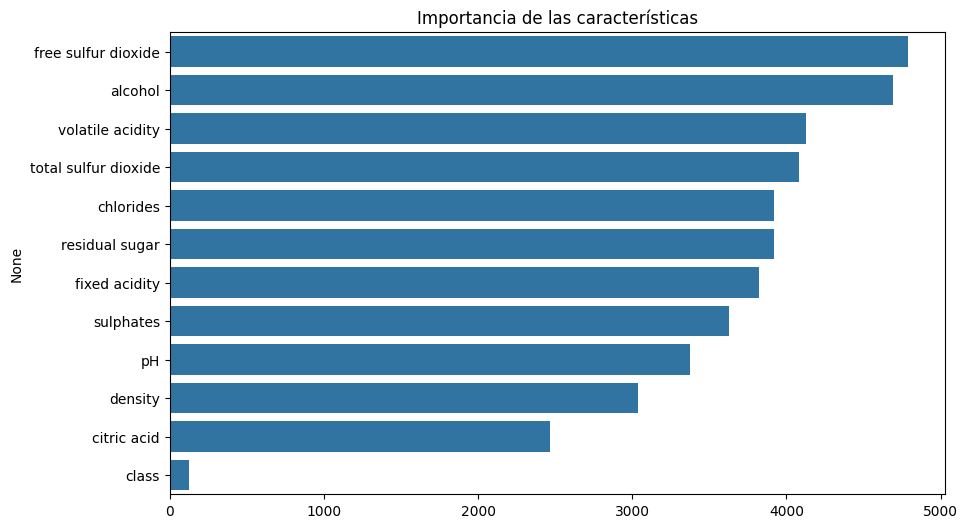

In [48]:
# Obtener las importancias y las características
feature_importances = best_model.feature_importances_
features = X_train_clf_dict["CAT + NUM_1 + NUM_2 (TODAS)"].columns

# Ordenar las importancias de mayor a menor
sorted_idx = feature_importances.argsort()[::-1]  # Orden descendente
sorted_importances = feature_importances[sorted_idx]
sorted_features = features[sorted_idx]

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, 
            y=sorted_features)
plt.title("Importancia de las características")
plt.show()


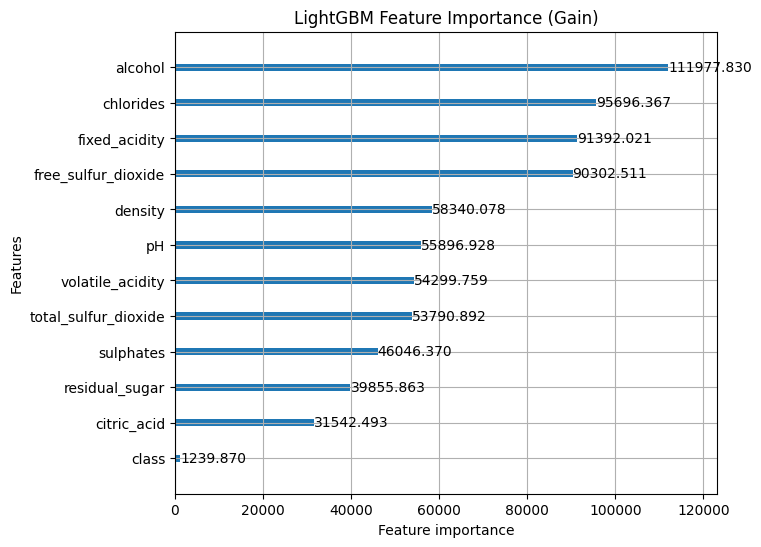

In [49]:
from lightgbm import plot_importance

# Genera un gráfico de importancia de características basado en el modelo entrenado de LightGBM. 

# Especifica el tipo de importancia como "gain" (GANANCIA), que calcula la importancia de cada característica según 
# la mejora en la precisión lograda al utilizarla para realizar divisiones en los árboles de decisión.

plot_importance(lgb_grid.best_estimator_,
                importance_type="gain",
                figsize=(7,6),
                title="LightGBM Feature Importance (Gain)")
plt.show()

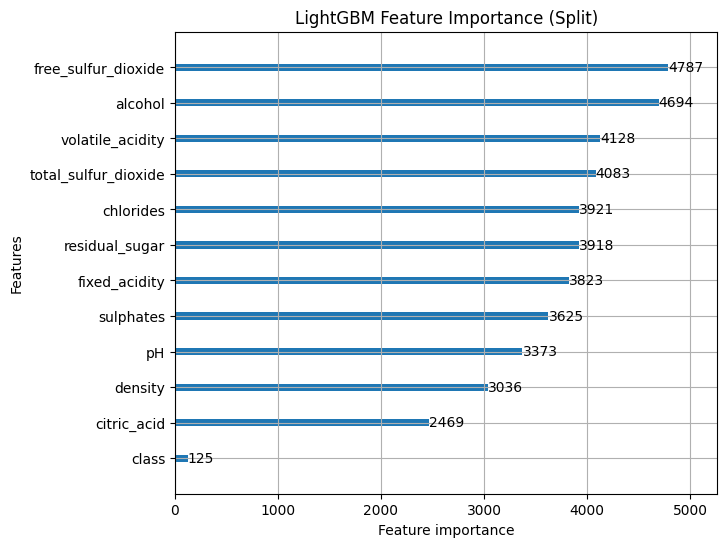

In [50]:
# Genera un gráfico de importancia de características basado en el modelo entrenado de LightGBM. 

# Especifica el tipo de importancia como "split" (DIVISIÓN), que calcula la importancia de cada característica según 
# la frecuencia con la que se usa para dividir los datos en los árboles de decisión durante el entrenamiento, 
# lo que ayuda a evaluar su relevancia en la toma de decisiones.

plot_importance(lgb_grid.best_estimator_,
                importance_type="split",
                figsize=(7,6),
                title="LightGBM Feature Importance (Split)")
plt.show()

*¿La importancia que ha dado el modelo a las features coincide con nuestra previsión inicial?  
"Food for thought" como dicen en Inglaterra* :-)

### 6. EVALUACION contra TEST

In [56]:
from sklearn.metrics import classification_report, balanced_accuracy_score

# Realizar predicciones
y_pred = best_model.predict(X_test_clf_dict["CAT + NUM_1 + NUM_2 (TODAS)"]) 

# Imprimir el reporte de clasificación
print(classification_report(y_test_clf, y_pred))

# Calcular la Balanced Accuracy
print("Balanced Accuracy:", balanced_accuracy_score(y_test_clf, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.17      0.40      0.24        43
           5       0.62      0.61      0.61       432
           6       0.64      0.38      0.48       562
           7       0.39      0.62      0.48       210
           8       0.31      0.62      0.41        47
           9       0.00      0.00      0.00         0

    accuracy                           0.50      1300
   macro avg       0.30      0.38      0.32      1300
weighted avg       0.56      0.50      0.51      1300

Balanced Accuracy: 0.4378337926844547


c:\Users\Carlos Noya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos Noya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos Noya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [58]:
y_pred = lgb_grid.best_estimator_.predict(X_test_clf_dict["CAT + NUM_1 + NUM_2 (TODAS)"])
# print(classification_report(y_test_clf, y_pred))

print(classification_report(y_test_clf, y_pred, zero_division= 0.0)) # Sin warnings

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.17      0.40      0.24        43
           5       0.62      0.61      0.61       432
           6       0.64      0.38      0.48       562
           7       0.39      0.62      0.48       210
           8       0.31      0.62      0.41        47
           9       0.00      0.00      0.00         0

    accuracy                           0.50      1300
   macro avg       0.30      0.38      0.32      1300
weighted avg       0.56      0.50      0.51      1300



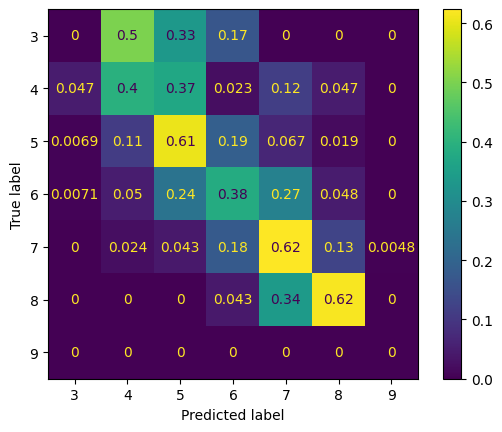

In [57]:
# Matriz de confusión

ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred, normalize = "true")
# ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred)
plt.show()

In [ ]:
'''
*Como era de esperar hay bastante poco acierto en general porque hay clases que son tan minoritarias que son idectectables, por ejemplo la calidad 3 es confundida principalmente por un 4 o un 5. La calidad 9 es tan baja que no aparece ni en el test y por tanto tan poco se cuenta, aunque el modeo si que la otorga (a un real 7 que lo puntúa como 9).*

*Cosas a destacar que pueden ayudarnos a mejorar o plantear alternativas:*
*El recall es realtivamente aceptable en la escala central 5 a 8, salvo curiosamente para el 6, donde hay una fuerte bajada.*  

*Para bien la mayoría de los errores son en puntuaciones uno arriba uno abajo (salvo para el 3), lo cual podemos tenerlo en cuenta quizá para ajustar las probabilidades de corte para que se más exigente y así hacer que las clases se separen más.*  

*Otras posibles mejoras: Hacer un primer clasificador de más de o igual a 6  puntos frente a menos de 6, y luego intentar clasificar más precisamente en un modelo ensamblado siguiente. O bien podríamos convertirlo en un problema de regresión*  

*Por supuesto conseguir más datos en los que haya calidades más altas y más bajas ayudaría*

'''

## #B Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [59]:
# Target regresión
train_set_reg = train_set.copy()
test_set_reg = test_set.copy()

target_reg= "alcohol"

train_set.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.9960,3.33,0.93,11.3,5,red
947,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.9996,3.38,0.67,9.0,6,white
877,7.6,0.51,0.24,1.2,0.040,10.0,104.0,0.9920,3.05,0.29,10.8,6,white


### 2. miniEDA

#### 2.1. Categóricas

*Tengo para analizar 'quality' y 'class'*

class


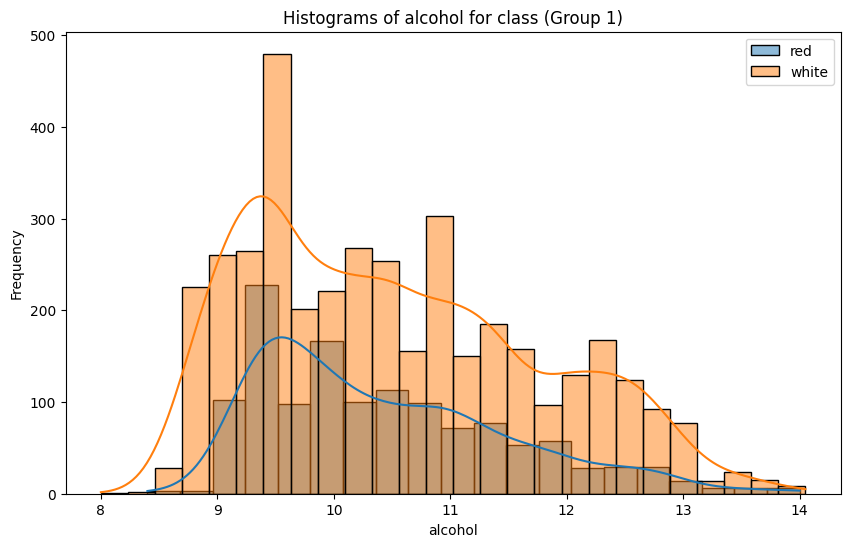


quality


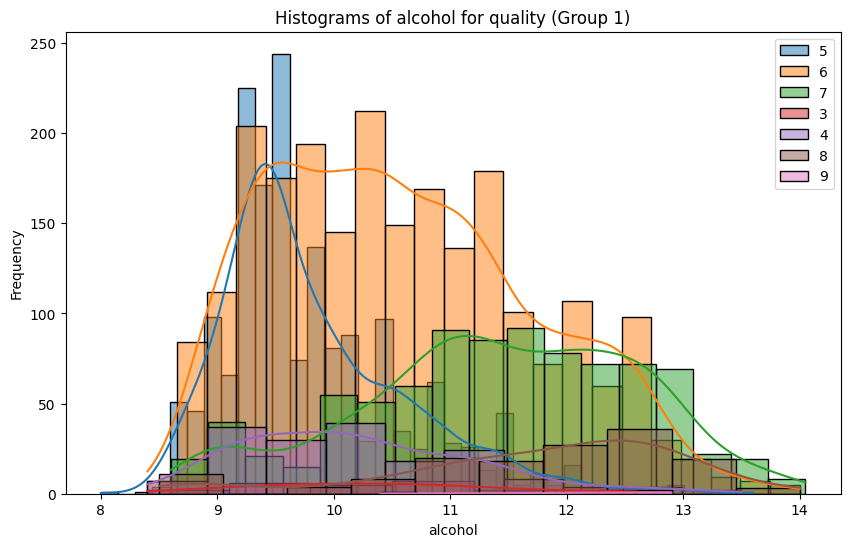

In [ ]:
# variables categóricas
features_cat_reg = ["class", "quality"]

for col in features_cat_reg:
    print(f"{col}")
    bt.plot_grouped_histograms(train_set, 
                               cat_col= col, 
                               num_col= target_reg, 
                               group_size= train_set[col].nunique())
    print("")

- *Parece que hay un mínimo de alcohol para el tinto que es mayor que para blanco, nos  quedamos "class" porque los últimos jueces son nuestros modelos*
- *'Alcohol' ya se vio antes, pero como se muestra, nos la quedamos*

In [ ]:
features_cat_reg = ["class", "quality"]

#### 2.2. Numéricas

In [ ]:
# variables numericas
features_num_reg = [col for col in train_set.columns if col not in features_cat_reg]
features_num_reg

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

##### 2.2.1. Correlaciones NUM-NUM

In [ ]:
# 1º CORRELACIONES NUM-NUM
corr = train_set.corr(numeric_only= True)
serie_corr = np.abs(corr[target_reg]).sort_values(ascending = False)
serie_corr

alcohol                 1.000000
density                 0.682345
quality                 0.450403
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
citric acid             0.005690
sulphates               0.000412
Name: alcohol, dtype: float64

- *Nos quedamos con las que tengan r > 0.1, aunque podíamos haber sido más exigentes*
- Ojo, se nos ha colado quality (pero para nosotros es categórica)

In [ ]:
r_min = 0.10

features_num_reg_1 = serie_corr[serie_corr > r_min].index.to_list()
features_num_reg_1.remove("quality")
features_num_reg_1.remove(target_reg)

features_num_reg_2 = [col for col in train_set.columns if col not in features_num_reg_1 and col != target_reg
                       and col not in features_cat_reg]

In [ ]:
print(features_num_reg_1)
print(features_num_reg_2)

['density', 'residual sugar', 'total sulfur dioxide', 'chlorides', 'free sulfur dioxide', 'pH']
['fixed acidity', 'volatile acidity', 'citric acid', 'sulphates']


In [ ]:
# 2º COLINEALIDAD

In [ ]:
np.abs(df[features_num_reg_1].corr(numeric_only = True))

,density,residual sugar,total sulfur dioxide,chlorides,free sulfur dioxide,pH
density,1.000000,0.552517,0.032395,0.362615,0.025717,0.011686
residual sugar,0.552517,1.000000,0.495482,0.128940,0.402871,0.267320
total sulfur dioxide,0.032395,0.495482,1.000000,0.279630,0.720934,0.238413
chlorides,0.362615,0.128940,0.279630,1.000000,0.195045,0.044708
free sulfur dioxide,0.025717,0.402871,0.720934,0.195045,1.000000,0.145854
pH,0.011686,0.267320,0.238413,0.044708,0.145854,1.000000


<Axes: >

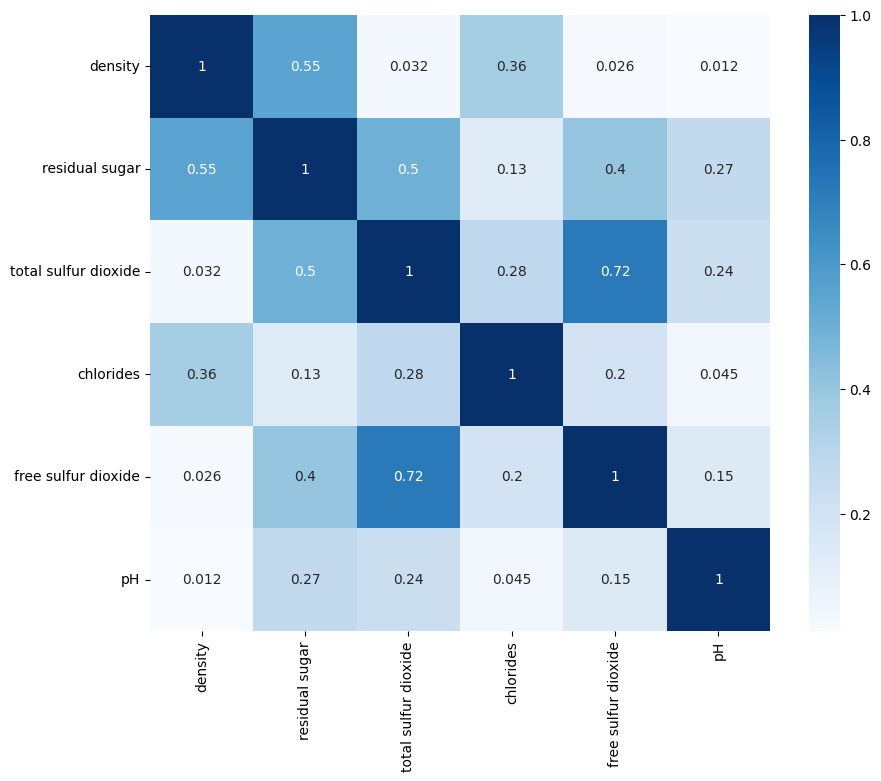

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(abs(np.abs(df[features_num_reg_1].corr(numeric_only = True))), annot= True, cmap = "Blues")

*Aunque hay alguna correlación relativamente significativa entre las features numéricas (residual sugar y density), la que más destaca como era de esperar es la de free sulfur dioxide y total sulfur dioxide. Podemos quedarnos con una y probar a deja la otra fuera*

In [ ]:
features_num_reg_1.remove("free sulfur dioxide") # Es la que menos correla con alcohol.
features_num_reg_2.append("free sulfur dioxide")

#### 2.3. Seleccion de features

In [ ]:
print(features_cat_reg)
print(features_num_reg_1)
print(features_num_reg_2)

['class', 'quality']
['density', 'residual sugar', 'total sulfur dioxide', 'chlorides', 'pH']
['fixed acidity', 'volatile acidity', 'citric acid', 'sulphates', 'free sulfur dioxide']


### 3. TRATAMIENTO DE FEATURES

#### 3.1. Categóricas

In [ ]:
# REALIZADO ANTES en el problema de categoricas

# Mapeo y asigno 0,1 la variable "class" tanto en TRAIN como en TEST
#   train_set["class"] = (train_set["class"] == "white").astype(int) # white -> clase 1, red -> clase 0
#   test_set["class"] = (test_set["class"] == "white").astype(int) # white -> clase 1, red -> clase 0

*Quality ya es numerica, tendremos que escalarla*

#### 3.2. Numéricas

##### 3.2.1. Transformaciones

##### 3.2.2. Escalado

In [ ]:
scaler = StandardScaler()

features_num_reg = features_num_clf.copy()
features_num_reg.remove("alcohol") # Alcohol es nuestro target (por eso no hay que estandarizarla)

# Transformaciones a TRAIN y TEST
train_set_scaled[features_num_reg] = scaler.fit_transform(train_set_scaled[features_num_reg])
test_set_scaled[features_num_reg] = scaler.transform(test_set_scaled[features_num_reg])

# Checkeo
train_set_scaled[features_num_reg].describe()

*No, no nos hemos olvidado de quality pero ya está convertida a ordinal como numérica discreta que es con rango limitado o pequeño de valores*

### 4. MODELADO

#### 4.1 X,y

In [ ]:
y_train_reg = train_set[target_reg]
y_test_reg = test_set[target_reg]


X_train_reg_dict = {}
X_test_reg_dict = {}

# Juegos X_train regresion
    
features_set_name = ["cat+num_1","todas"]
features_set = [features_cat_reg + features_num_reg_1,
                features_cat_reg + features_num_reg_1 + features_num_reg_2]

for set_name,feature_list in zip(features_set_name, features_set):
    print(feature_list)
    X_train_reg_dict[set_name] = train_set_scaled[feature_list]
    X_test_reg_dict[set_name] = test_set_scaled[feature_list]

#### 4.2 Instaciación de modelos

In [ ]:
rf_reg = RandomForestRegressor(max_depth = 10, 
                               random_state= 42)
lgb_reg = LGBMRegressor(max_depth = 10, 
                        random_state = 42, 
                        verbose = -100)
xgb_reg = XGBRegressor(max_depth = 10, 
                       random_state = 42)

modelos_reg = {
    "Random Forest": rf_reg,
    "LightGBM": lgb_reg,
    "XGBoost Regressor": xgb_reg
}

##### 4.2.1. Valdiacion cruzada

In [ ]:
for feature_set, X_train in X_train_reg_dict.items():
    print(f"Para el set {feature_set}:")
    for tipo,modelo in modelos_reg.items():
        print(f"{tipo}: ", end = " ")
        print(-np.mean(cross_val_score(modelo, 
                                       X_train, 
                                       y_train_reg, 
                                       cv = 5, 
                                       scoring = "neg_mean_absolute_percentage_error")))
    print(" ")

*Nota: los valores del MAPE en scikit-learn son en rango [0,1] y no [0,100], por lo que un MAPE de 2 significaría un error del 200%*

*Menor MAPE usando todas las features, en este caso nos quedaremos con el RandomForest por simplicidad frente al XGBoost ya que las métricas son muy similares (los errores son practicamente nulos en todos los casos, clavan las predicciones en comparación con el problema de clasificación)*

### 5. ENTRENAMIENTO y ajustes HIPERPARÁMETROS, modelos escodigo --> *XGBoost*

In [ ]:
param_grid = {
    "n_estimators": [100,200,1000],
    "max_depth": [1,5,10,20],
    "max_features": ["log2","sqrt", None]
}

rf_reg = RandomForestRegressor()

rf_grid = GridSearchCV(rf_reg,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "neg_mean_absolute_percentage_error",
                       n_jobs= -1)

rf_grid.fit(X_train_reg_dict["todas"], y_train_reg)

In [ ]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

In [ ]:
y_pred = rf_grid.best_estimator_.predict(X_test_reg_dict["todas"])
print("MAPE:", mean_absolute_percentage_error(y_test_reg, y_pred))

In [ ]:

def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

In [ ]:
plot_predictions_vs_actual(y_test_reg, y_pred)

*Si alguien recuerda que en la sesión en vivo las predicciones eran casi perfectas, estabáis en lo correcto -> había un error y siempre hay que desconfiar de los modelos perfectos :-)*

*Con el error corregido, sigue teniendo muy buen métrica contra test*

In [ ]:
pd.DataFrame({"features": rf_grid.best_estimator_.feature_names_in_ , 
              "importance": rf_grid.best_estimator_.feature_importances_}).sort_values("importance",ascending=False)

*Misma pregunta que en el clasificador, ¿la importancia que ha dado el modelo a las features coincide con nuestra previsión inicial?* :-)

## EXTRA: Guardado del modelo para su reutilización

In [ ]:
import pickle

# Guardar el modelo en un archivo con extensión .pkl
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_grid.best_estimator_, file)


In [ ]:
# Cargar el modelo
with open('rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
loaded_model

RandomForestRegressor(max_depth=20, max_features=None, n_estimators=1000)

In [ ]:
# joblib es una alternativa a pickle, lo veremos pero podéis investigar :-)